<a href="https://colab.research.google.com/github/Yadukrishnan1/stock-trading-ml/blob/master/stock_trade_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
from cycler import cycler
from matplotlib.pyplot import cm
%config InlineBackend.figure_formats = {'png', 'retina'}
from IPython.display import Audio

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
!pip install alpha-vantage

In [31]:
from alpha_vantage.timeseries import TimeSeries
# Your key here
key = 'JHW7SMKDWPCEH4P5'
ts = TimeSeries(key, output_format='pandas')
aapl, meta = ts.get_daily(symbol='AAPL')
data, meta_data = ts.get_intraday(symbol='aapl',interval='5min', outputsize='compact')
data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-07-31 20:00:00,427.8000,427.830,427.44,427.440,26718.0
2020-07-31 19:55:00,427.7000,427.850,427.66,427.760,17948.0
2020-07-31 19:50:00,427.6100,427.750,427.60,427.740,12038.0
2020-07-31 19:45:00,427.6000,427.700,427.57,427.600,9008.0
2020-07-31 19:40:00,427.5600,427.700,427.55,427.600,6203.0
...,...,...,...,...,...
2020-07-31 12:05:00,410.3700,410.860,410.14,410.800,449156.0
2020-07-31 12:00:00,411.4700,411.525,409.70,410.390,778793.0
2020-07-31 11:55:00,412.0000,412.220,411.05,411.445,750584.0


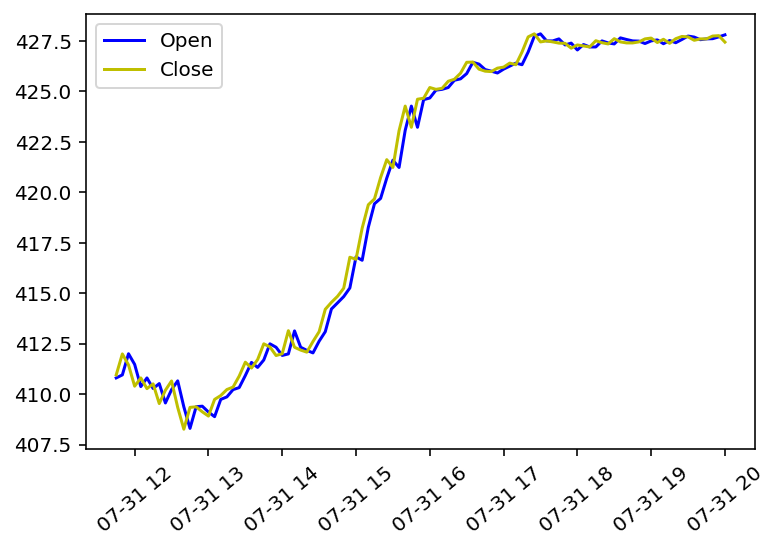

In [37]:
plt.plot(data['1. open'] ,'b-', label='Open')
plt.plot(data['4. close'],'y-', label='Close')
# plt.plot(data['2. high'] ,'g-', label='High')
# plt.plot(data['3. low']  ,'r-', label='Low')
plt.legend(loc='best')
plt.xticks(rotation=40)
plt.show()

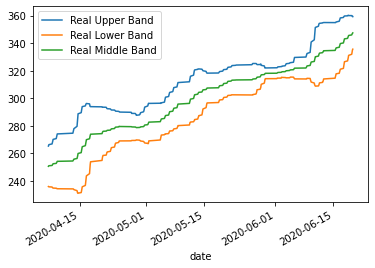

In [ ]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

key = 'JHW7SMKDWPCEH4P5'
ti = TechIndicators(key, output_format='pandas')
data, meta_data = ti.get_bbands(symbol='aapl',interval='60min', time_period=60)
data.plot()
plt.show()

In [47]:
from alpha_vantage.sectorperformance import SectorPerformances
import matplotlib.pyplot as plt

key = 'JHW7SMKDWPCEH4P5'
sp = SectorPerformances(key, output_format='pandas')
data, meta_data = sp.get_sector()
# print(data)
# print(meta_data)
data['Rank B: Day Performance'].plot(kind='barh')
plt.title('Day Performance (%) per Sector')
# plt.xticks(rotation=60)
plt.show()

ValueError: ignored

Enter stock name:aapl


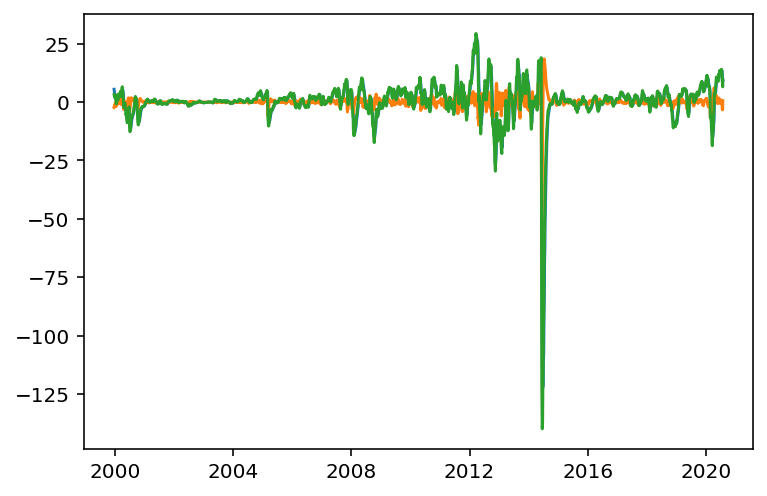

In [38]:
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt
from click._compat import raw_input
from alpha_vantage.timeseries import TimeSeries
import pandas as pd

class TechnicalIndicators:
    def __init__(self):
        self.api_key= 'JHW7SMKDWPCEH4P5'
        self.stock_name=self.question()
        self.macd_data=self.macd()
        self.rsi_data=self.rsi()
        self.bbands_data=self.bbands()
        self.close_data=self.close()
        self.sma_data=self.sma()
    def question(self):
        stock_name=raw_input("Enter stock name:")
        return stock_name
    def macd(self):
        a = TechIndicators(key=self.api_key, output_format='pandas')
        data, meta_data=a.get_macd(symbol=self.stock_name,interval='daily')
        return data
    def rsi(self):
        b=TechIndicators(key=self.api_key,output_format='pandas')
        data,meta_data = b.get_rsi(symbol=self.stock_name,interval='daily',time_period=14)
        return data
    def bbands (self):
        c=TechIndicators(key=self.api_key,output_format='pandas')
        data,meta_data=c.get_bbands(symbol=self.stock_name)
        return data
    def sma(self):
        d= TechIndicators(key=self.api_key, output_format='pandas')
        data, meta_data = d.get_sma(symbol=self.stock_name,time_period=30)
        return data
    def close(self):
        d=TimeSeries(key=self.api_key,output_format='pandas')
        data,meta_data=d.get_daily(symbol=self.stock_name,outputsize='full')
        return data

if __name__ == "__main__":
    TI=TechnicalIndicators()
    macd_data = TI.macd_data
    plt.plot(macd_data)
    plt.show()

In [21]:
#@title Default title text
from getpass import getpass
import os

In [ ]:
#@title Default title text
AV_KEY = getpass('AlphaVantage API Key (https://www.alphavantage.co/support/#api-key)')

In [ ]:
#@title Default title text
sym='MSFT'

import urllib.request

fname = 'daily_adjusted_' + sym +'.csv'

if not os.path.isfile(fname):
  v = urllib.request.urlopen("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=" + sym + "&apikey=" + AV_KEY + "&outputsize=full&datatype=csv").read()
  with open(fname, 'wb') as f:
    f.write(v)